# Logística de envíos: ¿Cuándo llega?

## Mentoría DiploDatos 2019 

### Integrantes:

- Alini, Walter
- Salina, Noelia

### Mentora:

- Dal Lago, Virginia

### Práctico: Introducción al Apendizaje Automático

## Motivación

En la actualidad, cada vez más productos se comercializan a través de una plataforma online. Una de las principales ventajas de este sistema es que el usuario puede recibir el producto en su domicilio en una fecha determinada. Pero, ¿cómo sabemos qué día va a llegar? ¿A partir de qué datos podemos predecir la demora del envío? En este práctico se trabajará con datos de envíos de MercadoLibre, el e-commerce más grande de Latinoamérica, analizando y modelando el problema de logística de envíos para poder responder ¿cuándo llega?

## Descripción del dataset

**Datos:**  El conjunto de datos seleccionado para realizar el práctico corresponde a un muestreo aleatorio no uniforme de 500.000 envíos de MercadoLibre. Estos envíos fueron realizados en Brasil en el período comprendido entre Octubre de 2018 y Abril de 2019 (las fechas originales han sido modificadas y adaptadas a un período de tiempo diferente, conservando el día de la semana y considerando los feriados correspondientes). Mientras que las fechas han sido modificadas, los horarios registrados en el dataset son los originales. Los datos comprenden variables tanto categóricas como numéricas. 

El dataset cuenta con las siguientes columnas:

- **Sender_state:** Estado de Brasil de donde sale el envío.
- **Sender_zipcode:** Código postal (de 5 dígitos) de donde sale el envío.
- **Receiver_state:** Estado de Brasil a donde llega el envío.
- **Receiver_zipcode:** Código postal (de 5 dígitos) a donde llega el envío.
- **Shipment_type:** Método de envío (normal, express, super).
- **Quantity:** Cantidad de productos en un envío.
- **Service:** Servicio del correo con el cual se realizó un envío.
- **Status:** Estado del envío (set: listo para ser enviado, sent: enviado, done: entregado, failed: no entregado, cancelled: cancelado).
- **Date_created:** Fecha de creación del envío.
- **Date_sent:** Fecha y hora en que se realizó el envío (salió del correo).
- **Date_visit:** Fecha y hora en que se entregó el envío al destinatario.
- **Shipment_days:** Días hábiles entre que el envío fue enviado (salió del correo) y que fue entregado.

## Objetivos generales

* Realizar de manera completa el proceso de desarrollo de un modelo de aprendizaje automático para determinar cuándo llega un envío. 
* Desarrollar el conocimiento práctico sobre dicho proceso, desde la definición de los datasets, la elección y análisis del modelo y las métricas propias para la problemática.
* Desarrollar habilidades de comunicación de la información obtenida a partir de los datos de manera clara y sencilla.


## Objetivos específicos

* Desafiar las decisiones e implementaciones realizadas en el práctico anterior, respecto a la transformación y selección de features.
* Aprender y aplicar técnicas de particionado de datasets para problemáticas de naturaleza temporal.
* Afianzar los conocimientos sobre los tipos de modelos aplicables a la problemática y ampliación de los criterios para la selección de los mismos.
* Ampliar la experiencia en la selección de hiperparámetros y la evaluación de modelos.
* Conocer, compartir e incrementar la dinámica de trabajo grupal.

## Metodología

A partir de lo estudiado en las clases teóricas y prácticas de la materia “Introducción al aprendizaje automático”, realizar un informe en formato de notebook o interactivo, en el cual se respondan, y justifiquen, las siguientes preguntas (además de cualquiera otra información extra que se considere de relevancia sobre la problemática): 

1. En el práctico anterior se respondió al siguiente enunciado: “A la hora de determinar la promesa de entrega de un envío (fecha estimada de llegada), ¿cuáles son los features que consideran pueden tener mayor relevancia? ¿Cuál es el valor a predecir?”. Recupere esa respuesta y presente un breve resumen de los features que consideraron de mayor relevancia y el target seleccionado para predecir.
2. El primer paso para desarrollar un modelo de aprendizaje automático es contar con datos limpios. ¿Qué pasos harían para limpiar el dataset?
3. Es necesario poder separar el dataset en un conjunto de entrenamiento y en uno de test. ¿Cómo realizaría esta separación? ¿Qué tamaño emplearía para cada uno considerando que partimos de 500.000 datos?
4. Dados los datos que disponemos y el target antes seleccionado, ¿qué tipo de modelo emplearían (regresión o clasificación)?
5. Definir el modelo a utilizar, entrenar y evaluar el mismo utilizando los valores por defecto propios de la librería scikit-learn. Analizar los resultados obtenidos en el contexto de la problemática (por ejemplo, ¿por qué creen que para ciertos valores del target tiene mejor performance que para otros?).
6. Modificar los hiperparámetros propios del modelo, y volver a entrenar y evaluar. ¿Por qué se eligió dicho valor para modificar? ¿Qué consecuencias tuvo? ¿Mejoró la performance del modelo? Analice los resultados obtenidos en el contexto de la problemática.
7. En los puntos anteriores se seleccionó un modelo de regresión o bien uno de clasificación. Realice una prueba con un modelo del otro tipo y comente sobre las métricas y los resultados obtenidos. ¿Por qué tuvo mejor o peor perfomance?

Esta comunicación debe estar dirigida para un público técnico pero que desconoce los aspectos propios del problema a resolver (por ejemplo, sus compañeros de clase). Se evaluará, principalmente, la claridad del mensaje presentado, el uso de las herramientas, los conceptos y los modelos desarrollados en las clases teóricas. 

## Estructura del informe


El informe debe contar con la estructura propia de un reporte de un experimento científico. Esto implica que debe tener un objetivo claro, una introducción a la problemática a resolver en dicho informe (no únicamente al problema general), una descripción de los datos a emplear, el desarrollo propiamente dicho del experimento y las conclusiones que se obtuvieron.

En el informe se deberá brindar una descripción del dataset suministrado (columnas, tipo de variables, valores extremos, etc.), las visualizaciones realizadas que sean pertinentes para la resolución del práctico, un análisis del modelo seleccionado, el análisis y las respuestas a las preguntas indicadas anteriormente, y las conclusiones.


## Entrega

* Muestra de avance: Viernes 19 de Julio
* Informe final: Viernes 26 de Julio

## Desarrollo

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import time
import math

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model, tree, neighbors, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, make_scorer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from ml.visualization import plot_confusion_matrix, plot_learning_curve

#import warnings
#warnings.filterwarnings('ignore')

BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

RELATIVE_PATH = './'
DATA_FILE_FEATURES = 'data_sample_cleaned_features.csv'

TARGET_ID = 'shipment_days_category'
TARGET_CLASES = [x for x in range(6)]

TARGET_ID_REG = 'shipment_days'

# Establecemos una semilla por cuestiones de reproducibilidad
np.random.seed(0)

In [4]:
def rsme(real, prediction):
    """
    Returns Root Square Mean Error
    """
    sme = mean_squared_error(real, prediction)
    return sme**0.5


def threshold_round (number, threshold = 0.5):
    """
    Redondea number hacia arriba o abajo en función de threshold
    """ 
    (p_decimal, p_entera) = math.modf(number)
    if p_decimal < threshold:
        return int(p_entera)
    else:
        return int(p_entera) + 1

def is_in (number, mi, ma):
    return mi <= number <= ma

def map_categories_5 (number):
    """
    Clasifica number a la "categoría" del 0 al 5 más cercana
    """ 
    number = threshold_round (number)
    transform_list = [([-500,1], 0),
                      ([2,3], 1),
                      ([4,5], 2),
                      ([6,7], 3),
                      ([8,9], 4),
                      ([10, 500], 5)]
    for tuple_map in transform_list:
        if is_in (number, tuple_map[0][0],tuple_map[0][1]):
            return tuple_map[1]
    return "error"

def classify_regression_5 (predictions):
    """
    Para cada elemento de predictions (array), vamos a llevarlo
    a la categoría más cercana
    """ 

    return list(map (map_categories_5, predictions))

### Lectura y análisis inicial de los datos

In [5]:
ds = pd.read_csv(RELATIVE_PATH + DATA_FILE_FEATURES, 
                       dtype={'sender_zipcode':'int64',
                              'receiver_zipcode':'int64',
                              'quantity':'int64',
                              'service':'int64'},
                       parse_dates=['date_created','date_sent','date_visit'])

A continuación se muestran los datos (con sus correspondientes tipos) que se utilizarán durante el experimento, el cual fue obtenido a partir del dataset de features del **Práctico Nº2**

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490439 entries, 0 to 490438
Data columns (total 28 columns):
sender_state              490439 non-null object
sender_zipcode            490439 non-null int64
receiver_state_0          490439 non-null int64
receiver_state_1          490439 non-null int64
receiver_state_2          490439 non-null int64
receiver_state_3          490439 non-null int64
receiver_state_4          490439 non-null int64
receiver_state_5          490439 non-null int64
receiver_zipcode          490439 non-null int64
shipment_type             490439 non-null object
quantity                  490439 non-null int64
service_0                 490439 non-null int64
service_1                 490439 non-null int64
service_2                 490439 non-null int64
service_3                 490439 non-null int64
service_4                 490439 non-null int64
status                    490439 non-null object
date_created              490439 non-null datetime64[ns]
date_sent    

### 1. Resumen de features relevantes

> En el práctico anterior se respondió al siguiente enunciado: “A la hora de determinar la promesa de entrega de un envío (fecha estimada de llegada), ¿cuáles son los features que consideran pueden tener mayor relevancia? ¿Cuál es el valor a predecir?”. Recupere esa respuesta y presente un breve resumen de los features que consideraron de mayor relevancia y el target seleccionado para predecir

Del práctico número 2, se llegó a la conclusión de que los features que mayor valor aportaban eran:
* service
* receiver_zipcode

Por otro lado, el valor a predecir se decidió que sea un conjunto de categorías que representaban rangos de tiempos de entrega:
* shipment_days_category

In [7]:
selected_features = ['service_0', 'service_1', 'service_2', 'service_3', 'service_4', 'tf_receiver_zipcode']


De todas maneras, definimos un listado completo de features para analizar posteriormente ya que resulta de interés explorar cómo se comportan los modelos con todos los features y no limitar el análisis sólo a dos de ellos.

In [8]:
ds.columns

Index(['sender_state', 'sender_zipcode', 'receiver_state_0',
       'receiver_state_1', 'receiver_state_2', 'receiver_state_3',
       'receiver_state_4', 'receiver_state_5', 'receiver_zipcode',
       'shipment_type', 'quantity', 'service_0', 'service_1', 'service_2',
       'service_3', 'service_4', 'status', 'date_created', 'date_sent',
       'date_visit', 'shipment_days', 'receiver_state', 'receiver_frequency',
       'distance', 'tf_sender_zipcode', 'tf_receiver_zipcode', 'standard',
       'shipment_days_category'],
      dtype='object')

In [9]:
features_all = [ 'receiver_state_0',
       'receiver_state_1', 'receiver_state_2', 'receiver_state_3',
       'receiver_state_4', 'receiver_state_5', 'quantity', 'service_0', 'service_1', 'service_2',
       'service_3', 'service_4','receiver_frequency',
       'distance', 'tf_sender_zipcode', 'tf_receiver_zipcode', 'standard']

### 2. Limpieza de datos

> El primer paso para desarrollar un modelo de aprendizaje automático es contar con datos limpios. ¿Qué pasos harían para limpiar el dataset?

En los prácticos anteriores se implementaron prácticas para lograr un dataset limpio, entre las cuales se encontraron:

* Limpieza de nulos
* Limpieza de duplicados
* Limpieza de valores inconsistentes (shipment_days negativos)

A continuación se muestra que lo anterior ya no se encuentra presente en el dataset con el que se llevará a cabo el siguiente trabajo.

In [10]:
check_null = ds[ds.notnull()].shape == ds.shape
check_duplicates = ds[ds.duplicated()].shape[0] == 0
check_inconsistent = ds[ds.shipment_days < 0].shape[0] == 0
print(f'Chequeo de nulos: {check_null}')
print(f'Chequeo de duplicados: {check_duplicates}')
print(f'Chequeo de inconsistentes: {check_inconsistent}')

Chequeo de nulos: True
Chequeo de duplicados: True
Chequeo de inconsistentes: True


Bajo la hipótesis de que podrían existir datos 'outliers' que no deseamos que sean tomados por nuestro modelo para aprender, y luego predecir, analizamos la demora de los envíos junto con la distancia de los mismos.

En este caso esperamos visualizar que los envíos con menores distancias, estén concentrados en categorías con menor demora.

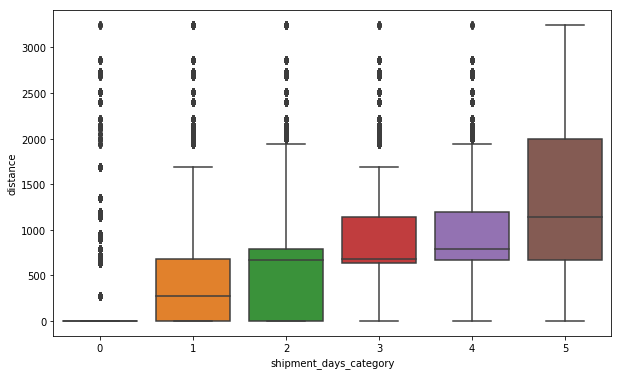

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=ds,
                  x='shipment_days_category', y='distance')

Del gráfico anterior, podemos observar el comportamiento esperado ya que:
- la categoría 0 (0 a 1 días de demora) concentra envíos de distancias alrededor de 0km
- las categorías 1 y 2 tienen envíos en el mismo rango de distancias pero sus medianas muestran que, en general, en la categoría 2 hay envíos con mayores distancias.
- las categorías 3 y 4, de manera similar a las dos anteriores, aunque mucho menos marcado, muestran el comportamiento esperado.
- la categoría 5 (10 o más días de demora) tiene envíos cuyas distancias, en su mayoría, son mayores a las demás categorías

Por lo tanto, se continua el práctico sin eliminar (más) datos.

### 3. Separación de dataset en Train y Test

> Es necesario poder separar el dataset en un conjunto de entrenamiento y en uno de test. ¿Cómo realizaría esta separación? ¿Qué tamaño emplearía para cada uno considerando que partimos de 500.000 datos?

En primera instancia se decide intentar una partición por porcentaje de datos, 80% para train y 20% para test, pero al tener el día 14-03-2019 compartido por ambos datasets, se decidió particionar por esa fecha. Por lo tanto, todos aquellos envíos creados hasta el día 14-03-2019 (inclusive) serán utilizados para entrenar (dataset de train) y los demás, para probar nuestros modelos (dataset de test).

El motivo por el cual se decidió tomar una partición aproximada a 80-20 se basó en lograr un equilibrio entre tener un gran porcentaje de datos para que nuestros modelos puedan aprender de ellos y un porcentaje inferior pero significativo (dada la gran cantidad de datos disponibles) para probar que nuestros modelos lograron generalizar bien el aprendizaje adquirido en el entrenamiento.

In [12]:
# se ordenan los envíos por fecha de creación (ascendentemente)
ds = ds.sort_values('date_created', ascending=True).reset_index(drop=True)

# se define inicialmente un tamaño para el dataset de train equivalente al 80% del tamaño total del dataset
train_size = int(ds.shape[0]*0.80) - 1

# se muestra la cantidad de envíos que quedarían en el dataset de train si se particionara con el criterio del
# porcentaje. Se muestran también las fechas de los envíos que quedarían en el dataset de train
ds.loc[0:train_size,:].date_created.describe()

count                  392351
unique                     94
top       2019-03-05 00:00:00
freq                    19802
first     2018-10-21 00:00:00
last      2019-03-14 00:00:00
Name: date_created, dtype: object

In [13]:
# Se muestra la cantidad de envíos que quedarían en el dataset de test si se particionara con el criterio del
# porcentaje. Se muestran también las fechas de los envíos que quedarían en el dataset de test
ds.loc[train_size + 1 :,:].date_created.describe()

count                   98088
unique                     15
top       2019-03-19 00:00:00
freq                    12439
first     2019-03-14 00:00:00
last      2019-03-28 00:00:00
Name: date_created, dtype: object

In [14]:
# Se define una fecha que utilizaremos como thresold para realizar la partición de datasets train y test
threshold_date = '2019-03-14'

# Se muestra la cantidad de envíos que quedarían en el dataset de train si se particiona con el criterio
# de la fecha. Se muestran también las fechas de los envíos que quedarían en el dataset de train
ds[ds.date_created <= threshold_date].date_created.describe()

count                  395577
unique                     94
top       2019-03-05 00:00:00
freq                    19802
first     2018-10-21 00:00:00
last      2019-03-14 00:00:00
Name: date_created, dtype: object

In [15]:
# se muestra la cantidad de envíos que quedarían en el dataset de test si se particiona con el criterio de la
# fecha. Se muestran también las fechas de los envíos que quedarían en el dataset de test
ds[ds.date_created > threshold_date].date_created.describe()

count                   94862
unique                     14
top       2019-03-19 00:00:00
freq                    12439
first     2019-03-15 00:00:00
last      2019-03-28 00:00:00
Name: date_created, dtype: object

In [16]:
# una vez adoptado un criterio, el de la fecha, se genera una nueva columna para contener el indicador de a cual
# dataset pertenece cada envío y se muestran los procentajes finales de cada dataset.
ds.loc[ds.date_created <= threshold_date, 'ds_train'] = True
ds.loc[ds.date_created > threshold_date, 'ds_train'] = False
ds['ds_train'].value_counts(normalize=True)

True     0.806577
False    0.193423
Name: ds_train, dtype: float64

#### 3.1 Análisis de distribución de clases

Antes de proceder con la división en Train y Test, repasamos la distribución de categorías del DS completo. 

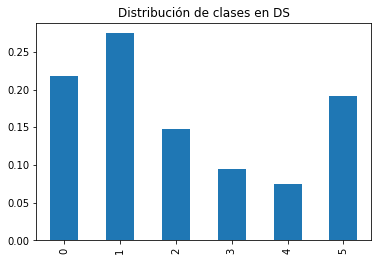

In [17]:
ds[TARGET_ID].value_counts(normalize=True,sort=False).plot(kind='bar',title='Distribución de clases en DS')

Se puede observar que el dataset tiene como clase mayoritaria a la categoría 1, seguido de la 0 y 5 y finalmente las 2, 3 y 4.

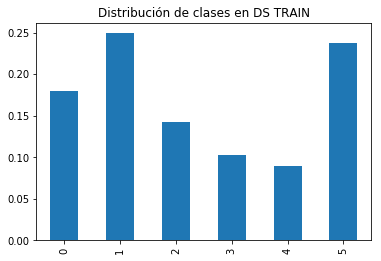

In [18]:
ds[ds.ds_train][TARGET_ID].value_counts(normalize=True,sort=False).plot(kind='bar', \
                                                                    title='Distribución de clases en DS TRAIN')

Se observa que el DS Train tiene una distribución de categorías muy parecida a la del DS completo. En el contexto de la problemática y la solución que perseguimos, interpretamos que esta condición puede resultar favorable para que el modelo que implementemos pueda entrenarse (o aprender) con ejemplos que son representativos del total de casos disponibles.

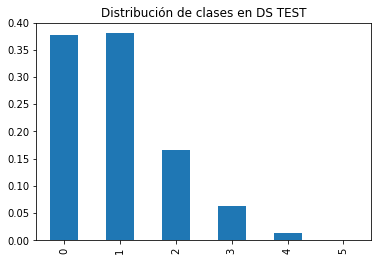

In [19]:
ds[~ds.ds_train][TARGET_ID].value_counts(normalize=True,sort=False).plot(kind='bar', \
                                                        title='Distribución de clases en DS TEST')

En el DS Test se observa una distribución muy diferente a del DS completo, ya que la categoría 5 practicamente no tiene ejemplos que la representen. En el contexto de la solución, interpretamos esto como una situación que no debería afectar a la performance del modelo, ya que esos ejemplos son tomados para entrenar (aprender) y, aunque no se utilice ese aprendizaje, el modelo va a ser capaz de responder a ellos si le toca hacerlo. Por otro lado, en lo que sí va a afectar es que no se van a poder contar con suficientes casos para tener confianza sobre la performance del modelo para esa categoría, ya que no hay muchos casos en el DS Test.

A continuación se analiza más en profundidad el desbalance de la categoría 5.

In [20]:
ds[(ds.shipment_days_category==5)][['date_created','distance','standard']].describe(include='all')

,date_created,distance,standard
count,93839,93839.000000,93839.000000
unique,93,NaN,NaN
top,2019-02-14 00:00:00,NaN,NaN
freq,4276,NaN,NaN
first,2018-10-21 00:00:00,NaN,NaN
last,2019-03-15 00:00:00,NaN,NaN
mean,NaN,1235.067371,0.981532
std,NaN,770.860225,0.134636
min,NaN,0.000000,0.000000
25%,NaN,664.000000,1.000000


Se puede observar que la categoría 5 desaparece el día `2019-03-15`; por lo tanto, dividir más allá de esa fecha, elimina la categoría del set de test.

Además, se considera que se puede continuar con la división actual ya que tenemos datos con todas las categorías en el set de train.

A continuación, se separan los datasets de train y test de acuerdo al análisis previo. Para el entrenamiento y validación de modelos se hará uso del dataset de train y se guardará el dataset de test para evaluar la performance de nuestros modelos.

In [21]:
ds_test = ds[~ds['ds_train']][features_all + [TARGET_ID, TARGET_ID_REG]]
ds_train = ds[ds['ds_train']][features_all + [TARGET_ID, TARGET_ID_REG]]

### 4. Selección del tipo de modelo (Regresión/Clasificación)

> Dados los datos que disponemos y el target antes seleccionado, ¿qué tipo de modelo emplearían (regresión o clasificación)?

Podemos pensar en ambas estrategias, en función de si pensamos el target como categórico (esto es, si queremos obtener un rango de fechas de entrega) -en cuyo caso, un modelo de clasificación sería lo primero a probar- o como numérico (esto es, si queremos obtener una predicción en cantidad de días hábiles de entrega) -en cuyo caso, deberíamos testear modelos de regresión-.

Empezaremos probando modelos de clasificación, que consideramos a priori que tendrán mejor performance, y luego probaremos algunos modelos de regresión.

### 5. Entrenamiento y evaluación del modelo seleccionado

> Definir el modelo a utilizar, entrenar y evaluar el mismo utilizando los valores por defecto propios de la librería scikit-learn. Analizar los resultados obtenidos en el contexto de la problemática (por ejemplo, ¿por qué creen que para ciertos valores del target tiene mejor performance que para otros?).

#### 5.0 Selección de métrica

Antes de iniciar los entrenamientos, es necesario definir la métrica que se utilizará para cuantificar la performance de los modelos y así poder compararlos y tomar decisiones en la selección de los mismos.

Al buscar la métrica, surgen dos aspectos importantes que deseamos cubrir. El primero de ellos es que debe **ser aplicable tanto a regresores como a clasificadores**, ya que necesitamos compararlos y para eso necesitamos medirlos de una misma manera. El segundo aspecto es que debe **brindar información de la magnitud de los errores**, ya que, por ejemplo, no es igual confundir la clase 0 con la 1, que la clase 0 con la 5. Dada la naturaleza de la problemática, es un error menos relevante confundir dos clases consecutivas, como 0 y 1, que dos clases no consecutivas como 0 y 5. En términos generales, *la diferencia entre los valores de las clases determina la magnitud del error*. 

Por lo tanto, los modelos tendrán una mejor performance, mientras tengan un menor valor de error. Esto último es válido tanto para clasificadores como para regresores.

In [22]:
# se define un scorer para utilizar la evaluación de los modelos
rsme_scorer = make_scorer(rsme, greater_is_better=False)

#### 5.1 Selección inicial entre diferentes modelos

Primero vamos a generar una muestra reducida que permita seleccionar el mejor modelo, con el criterio de lograr un sobre-ajuste para dicha muestra y luego entrenar con todo el data set de train y verificar que el modelo es, esperemos, capaz de generalizar y obtener buenas métricas.

Para obtener esa muestra, se utiliza `train_test_split` con la configuración que nos permita mantener la distribución del target en una muestra del 10%. El dataset sobrante se descarta ya que no le daremos uso.

In [23]:
results = pd.DataFrame(columns=('name','model', 'train_score','test_score', 'time','phase'))

In [24]:
features_sample, features_xx, labels_sample, labels_xx = train_test_split(ds_train[features_all], \
                                                    ds_train[TARGET_ID],
                                                    stratify=ds_train[TARGET_ID], 
                                                    test_size=0.90)
features_xx = None
labels_xx = None

In [25]:
sc = StandardScaler()
features_sample_std = sc.fit_transform(features_sample)

##### 5.1.1 Prueba con SGDClassifier

Time: 0.7848381996154785 seconds
Train Score: 1.3253409198136863
              precision    recall  f1-score   support

           0       0.51      0.77      0.61      7094
           1       0.49      0.42      0.45      9854
           2       0.28      0.14      0.18      5649
           3       0.19      0.05      0.07      4044
           4       0.21      0.06      0.09      3533
           5       0.55      0.90      0.68      9383

    accuracy                           0.48     39557
   macro avg       0.37      0.39      0.35     39557
weighted avg       0.42      0.48      0.42     39557



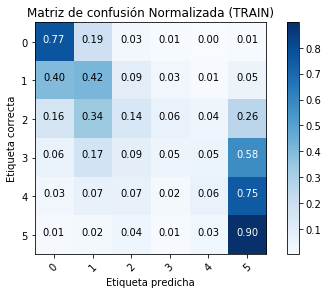

In [26]:
start_time = time.time()
sgdc_linear = linear_model.SGDClassifier(random_state=0)
sgdc_linear.fit(features_sample_std,labels_sample)
y_pred_train = sgdc_linear.predict(features_sample_std)
total_time = time.time() - start_time
print("Time: %s seconds" % (total_time))
results = results.append({'name': 'SGDClassifier',
                          'model': sgdc_linear,
                          'train_score': rsme(y_pred_train,labels_sample),
                          'test_score': np.NaN,
                          'time': total_time,
                          'phase': 'Prueba'}, ignore_index=True)
print("Train Score: %s" % rsme(labels_sample, y_pred_train))
print(classification_report(labels_sample, y_pred_train,labels=TARGET_CLASES))
plot_confusion_matrix(confusion_matrix(labels_sample, y_pred_train),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión Normalizada (TRAIN)")

Este clasificador implementa una predicción linear con descenso de gradientes, que predice sesgado sobre todo a las etiquetas 1 y 5, con lo cual la precisión es baja.

La interpretación, en el contexto de la problemática, indica que este modelo no es capaz de adaptarse a los datos del dataset; particularmente, muestra una tendencia de predicción sobre las categorías 1 y 5. Por lo tanto, de seleccionar este modelo, es muy probable que la mayorías de los envíos tengan predicciones de 1 o 5 y dado que las categorías 0 y 2 están también entre las mayoritarias (después de 1 y 5), se esperaría tener una alta tasa de error.

##### 5.1.2 Prueba con DecisionTreeClassifier

Time: 0.226043701171875 seconds
Train Score: 0.13888348167771206
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7094
           1       0.99      0.99      0.99      9854
           2       0.99      0.99      0.99      5649
           3       0.99      0.99      0.99      4044
           4       0.99      0.99      0.99      3533
           5       1.00      0.99      1.00      9383

    accuracy                           0.99     39557
   macro avg       0.99      0.99      0.99     39557
weighted avg       0.99      0.99      0.99     39557



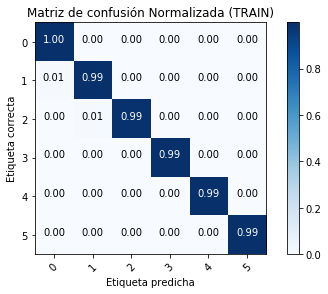

In [27]:
start_time = time.time()
clf_tree = tree.DecisionTreeClassifier(random_state=0)
clf_tree = clf_tree.fit(features_sample_std, labels_sample)
y_pred_train = clf_tree.predict(features_sample_std)
total_time = time.time() - start_time
print("Time: %s seconds" % (total_time))
results = results.append({'name': 'DecisionTreeClassifier',
                          'model': clf_tree,
                          'train_score': rsme(y_pred_train,labels_sample),
                          'test_score': np.NaN,
                          'time': total_time,
                          'phase': 'Prueba'}, ignore_index=True)
print("Train Score: %s" % rsme(labels_sample, y_pred_train))
print(classification_report(labels_sample, y_pred_train,labels=TARGET_CLASES))
plot_confusion_matrix(confusion_matrix(labels_sample, y_pred_train),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión Normalizada (TRAIN)")

Este clasificador precide a través de una decisión de árboles, en función de la distribución de los datos que posea. Vemos que la diagonal toma buenos valores para las todas las etiquetas.

La interpretación, en el contexto de la problemática, indica que este modelo es capaz de adaptarse a los datos del dataset, aunque posiblemente a costa de un sobre-ajuste que no pueda superarse al entrenar con todos los datos de train. De todas maneras, de elegir este modelo, todos los envíos podrían ser estimados prácticamente con exactitud.

##### 5.1.3 Prueba con RandomForestClassifier

/Users/nsalina/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Time: 0.54168701171875 seconds
Train Score: 0.32276737751571366
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7094
           1       0.96      0.97      0.96      9854
           2       0.97      0.94      0.95      5649
           3       0.97      0.94      0.96      4044
           4       0.97      0.94      0.95      3533
           5       0.97      0.98      0.98      9383

    accuracy                           0.96     39557
   macro avg       0.97      0.96      0.96     39557
weighted avg       0.96      0.96      0.96     39557



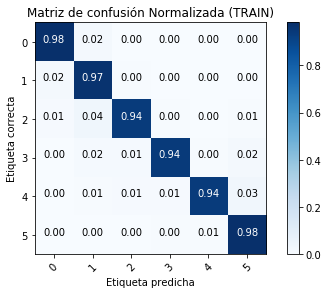

In [28]:
start_time = time.time()
clf_rfc = RandomForestClassifier(random_state=0)
clf_rfc = clf_rfc.fit(features_sample_std, labels_sample)
y_pred_train = clf_rfc.predict(features_sample_std)
total_time = time.time() - start_time
print("Time: %s seconds" % (total_time))
results = results.append({'name': 'RandomForestClassifier',
                          'model': clf_rfc,
                          'train_score': rsme(y_pred_train,labels_sample),
                          'test_score': np.NaN,
                          'time': total_time,
                          'phase': 'Prueba'}, ignore_index=True)
print("Train Score: %s" % rsme(labels_sample, y_pred_train))
print(classification_report(labels_sample, y_pred_train,labels=TARGET_CLASES, output_dict = False))
plot_confusion_matrix(confusion_matrix(labels_sample, y_pred_train),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión Normalizada (TRAIN)")

Este clasificador es una generalización del anterior de decisión. Vemos que tiene una buena clasificación para todas las etiquetas.

La interpretación, en el contexto de la problemática, es igual que en el caso de árbol de decisión; es decir que también es capaz de adaptarse a los datos del dataset, posiblemente a costa de un sobre-ajuste que no pueda superarse al entrenar con todos los datos de train y, si se elige este modelo, todos los envíos podrían ser estimados prácticamente con exactitud.

##### 5.1.4 Prueba con GradientBoostingClassifier

Time: 13.682717084884644 seconds
Train Score: 1.203827183929698
              precision    recall  f1-score   support

           0       0.65      0.57      0.61      7094
           1       0.52      0.70      0.60      9854
           2       0.39      0.24      0.30      5649
           3       0.37      0.04      0.07      4044
           4       0.46      0.03      0.06      3533
           5       0.55      0.94      0.69      9383

    accuracy                           0.54     39557
   macro avg       0.49      0.42      0.39     39557
weighted avg       0.51      0.54      0.48     39557



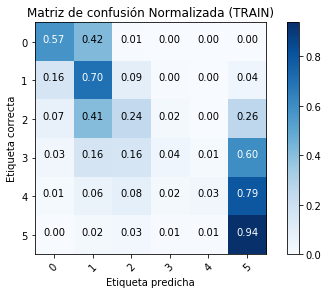

In [29]:
start_time = time.time()

clf_gbc = GradientBoostingClassifier(random_state=0)
clf_gbc = clf_gbc.fit(features_sample_std, labels_sample)
y_pred_train = clf_gbc.predict(features_sample_std)
total_time = time.time() - start_time
print("Time: %s seconds" % (total_time))
results = results.append({'name': 'GradientBoostingClassifier',
                          'model': clf_gbc,
                          'train_score': rsme(y_pred_train,labels_sample),
                          'test_score': np.NaN,
                          'time': total_time,
                          'phase': 'Prueba'}, ignore_index=True)
print("Train Score: %s" % rsme(labels_sample, y_pred_train))
print(classification_report(labels_sample, y_pred_train,labels=TARGET_CLASES, output_dict = False))
plot_confusion_matrix(confusion_matrix(labels_sample, y_pred_train),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión Normalizada (TRAIN)")

Este clasificador es una generalización de los clasificadores de Boosting para muchas funciones de loss. En este caso vemos que performa un poco peor que los dos anteriores, con similar comportamiento a SGDClassifier en las categorías.

Por lo tanto, en este caso también se observa una incapacidad de adaptación a los datos del dataset y una tendencia hacia las clases 5 y 1, por lo que si se elige este modelo, la mayoría de los envíos serían estimados como categoría 5 o 1 cuando el dataset tiene como mayoritarias (después de 5 y 1) a las clases 0 y 2.

##### 5.1.5 Prueba con KNeighborsClassifier

Time: 7.522428035736084 seconds
Train Score: 1.0635327706009459
              precision    recall  f1-score   support

           0       0.68      0.77      0.72      7094
           1       0.63      0.72      0.67      9854
           2       0.55      0.44      0.49      5649
           3       0.48      0.36      0.41      4044
           4       0.49      0.35      0.41      3533
           5       0.72      0.79      0.75      9383

    accuracy                           0.64     39557
   macro avg       0.59      0.57      0.58     39557
weighted avg       0.62      0.64      0.62     39557



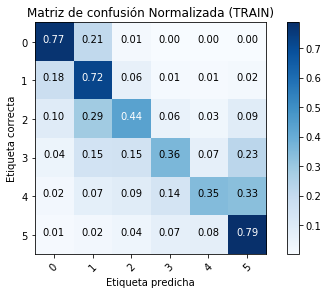

In [30]:
start_time = time.time()
clf_neigh = KNeighborsClassifier()
clf_neigh = clf_neigh.fit(features_sample_std, labels_sample)
y_pred_train = clf_neigh.predict(features_sample_std)
total_time = time.time() - start_time
print("Time: %s seconds" % (total_time))
results = results.append({'name': 'KNeighborsClassifier',
                          'model': clf_neigh,
                          'train_score': rsme(y_pred_train,labels_sample),
                          'test_score': np.NaN,
                          'time': total_time,
                          'phase': 'Prueba'}, ignore_index=True)
print("Train Score: %s" % rsme(labels_sample, y_pred_train))
print(classification_report(labels_sample, y_pred_train,labels=TARGET_CLASES, output_dict = False))
plot_confusion_matrix(confusion_matrix(labels_sample, y_pred_train),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión Normalizada (TRAIN)")

El clasificador de K vecinos más cercanos predice razonablemente bien (en relación a los otros clasificadores) las etiquetas 0, 1 y 5, pero no tanto las demás (que son las clases minoritarias).

En caso de elegir este modelo, se podría esperar que tenga una buena generalización al pasar del dataset de train al de test; es decir, que las métricas en ambos datasets no presente grandes diferencias y devuelvan valores de error aceptables. Por lo tanto, los envíos podrían no ser estimados con exactitud pero, en caso de equivocarse, el error no sería tan grande.

In [31]:
results

,name,model,train_score,test_score,time,phase
0,SGDClassifier,"SGDClassifier(alpha=0.0001, average=False, cla...",1.325341,NaN,0.784838,Prueba
1,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",0.138883,NaN,0.226044,Prueba
2,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",0.322767,NaN,0.541687,Prueba
3,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,1.203827,NaN,13.682717,Prueba
4,KNeighborsClassifier,"KNeighborsClassifier(algorithm='auto', leaf_si...",1.063533,NaN,7.522428,Prueba


Luego de entrenar los modelos con una pequeña porción de datos para ver si son capaces de representarlos, decidimos continuar con:
* Decision Trees
* Random Forest
* K Neighbors

En resumen, la selección de los dos primeros se basa en que devolvieron los valores de error más pequeños. En el caso de K Neighbors, pese al valor de la métrica y al tiempo consumido, se decide no descartarlo en esta instancia ya que se desea observar su comportamiento al entrenarse con todo el dataset de train y ver su capacidad de generalizar, en contraste con los otros dos de tipo árbol que son potencialmente "sobre-ajustables".

#### 5.2 Entrenamiento de modelos

Antes de comenzar el entrenamiento con todos los datos de train, se estandarizan los features ya que se utilizarán para entrenar algunos modelos que lo requieren, como ser K Neighbors y, más adelante, los regresores.

In [32]:
sc = StandardScaler()
features = ds_train[features_all]
features_std = sc.fit_transform(features)
labels = ds_train[TARGET_ID]
features_test = ds_test[features_all]
features_test_std = sc.transform(features_test)
labels_test = ds_test[TARGET_ID]

##### 5.2.1 Entrenamiento de DecisionTreeClassifier

Time: 1.7349791526794434 seconds
Train Score: 0.34585422429090695
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     70940
           1       0.95      0.96      0.95     98543
           2       0.95      0.94      0.95     56488
           3       0.94      0.94      0.94     40442
           4       0.95      0.94      0.94     35328
           5       0.99      0.95      0.97     93836

    accuracy                           0.96    395577
   macro avg       0.95      0.95      0.95    395577
weighted avg       0.96      0.96      0.96    395577

Test Score: 1.1905354731130915
              precision    recall  f1-score   support

           0       0.68      0.63      0.66     35860
           1       0.51      0.47      0.49     36067
           2       0.32      0.27      0.29     15665
           3       0.20      0.20      0.20      6015
           4       0.06      0.18      0.09      1252
           5       0.00      0.33  

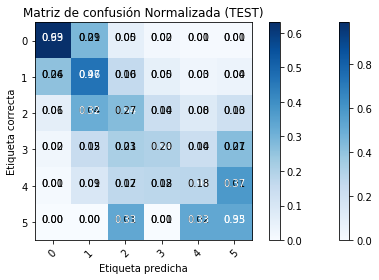

In [33]:
start_time = time.time()
clf_tree = tree.DecisionTreeClassifier(random_state=0)
clf_tree = clf_tree.fit(features_std, labels)
y_pred_train = clf_tree.predict(features_std)
total_time = time.time() - start_time
print("Time: %s seconds" % (total_time))

print("Train Score: %s" % rsme(labels, y_pred_train))
print(classification_report(labels, y_pred_train,labels=TARGET_CLASES))
plot_confusion_matrix(confusion_matrix(labels, y_pred_train),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión Normalizada (TRAIN)")

y_pred_test = clf_tree.predict(features_test_std)
print("Test Score: %s" % rsme(labels_test, y_pred_test))
print(classification_report(labels_test, y_pred_test,labels=TARGET_CLASES))
plot_confusion_matrix(confusion_matrix(labels_test, y_pred_test),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión Normalizada (TEST)")

results = results.append({'name': 'DecisionTreeClassifier',
                          'model': clf_tree,
                          'train_score': rsme(y_pred_train,labels),
                          'test_score': rsme(y_pred_test,labels_test),
                          'time': total_time,
                          'phase': 'Train'}, ignore_index=True)

Tal como se supuso inicialmente, al evaluar el modelo con el dataset de train los resultados fueron excelentes pero, al repetir la evaluación con el dataset de test, los resultados sufrieron una degradación muy importante, lo que indica que se dio una situación de sobre-ajuste. En caso de continuar con este modelo en la etapa de ajuste de hiper-parámetros, se intentará utilizar valores que eviten el sobre-ajuste.

##### 5.2.2 Entrenamiento de RandomForestClassifier

/Users/nsalina/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Time: 7.078236103057861 seconds
Train Score: 0.4376966734095447
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     70940
           1       0.92      0.93      0.93     98543
           2       0.92      0.90      0.91     56488
           3       0.92      0.89      0.91     40442
           4       0.92      0.89      0.91     35328
           5       0.95      0.96      0.95     93836

    accuracy                           0.93    395577
   macro avg       0.93      0.92      0.92    395577
weighted avg       0.93      0.93      0.93    395577

Test Score: 1.1347092555180869
              precision    recall  f1-score   support

           0       0.70      0.66      0.68     35860
           1       0.53      0.52      0.52     36067
           2       0.35      0.28      0.31     15665
           3       0.22      0.18      0.20      6015
           4       0.07      0.15      0.10      1252
           5       0.00      0.67    

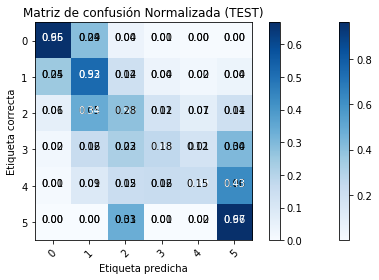

In [34]:
start_time = time.time()
clf_rfc = RandomForestClassifier(random_state=0)
clf_rfc = clf_rfc.fit(features_std, labels)
y_pred_train = clf_rfc.predict(features_std)
total_time = time.time() - start_time
print("Time: %s seconds" % (total_time))

print("Train Score: %s" % rsme(labels, y_pred_train))
print(classification_report(labels, y_pred_train,labels=TARGET_CLASES, output_dict = False))
plot_confusion_matrix(confusion_matrix(labels, y_pred_train),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión Normalizada (TRAIN)")

y_pred_test = clf_rfc.predict(features_test_std)
print("Test Score: %s" % rsme(labels_test, y_pred_test))
print(classification_report(labels_test, y_pred_test,labels=TARGET_CLASES))
plot_confusion_matrix(confusion_matrix(labels_test, y_pred_test),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión Normalizada (TEST)")

results = results.append({'name': 'RandomForestClassifier',
                          'model': clf_rfc,
                          'train_score': rsme(y_pred_train,labels),
                          'test_score': rsme(y_pred_test,labels_test),
                          'time': total_time,
                          'phase': 'Train'}, ignore_index=True)

In [35]:
clf_rfc_default_params = clf_rfc.get_params()
clf_rfc_default_params

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

De igual manera que para árboles de decisión, al evaluar el modelo con el dataset de train los resultados fueron excelentes y al repetir la evaluación con el dataset de test, los resultados sufrieron una degradación muy importante (aunque menor que para el árbol de decisión), evidenciando que también se dio una situación de sobre-ajuste. En caso de continuar con este modelo en la etapa de ajuste de hiper-parámetros, se tomará la misma acción que para el árbol de decisión y se intentará utilizar valores que eviten el sobre-ajuste.

##### 5.2.3 Entrenamiento de KNeighborsClassifier

Time: 720.2003126144409 seconds
Train Score: 1.0435899588073279
              precision    recall  f1-score   support

           0       0.69      0.78      0.73     70940
           1       0.64      0.72      0.67     98543
           2       0.55      0.45      0.49     56488
           3       0.49      0.37      0.42     40442
           4       0.50      0.35      0.41     35328
           5       0.73      0.79      0.76     93836

    accuracy                           0.64    395577
   macro avg       0.60      0.58      0.58    395577
weighted avg       0.63      0.64      0.63    395577

Test Score: 1.063787507733333
              precision    recall  f1-score   support

           0       0.69      0.70      0.69     35860
           1       0.53      0.55      0.54     36067
           2       0.40      0.26      0.32     15665
           3       0.24      0.15      0.19      6015
           4       0.07      0.12      0.09      1252
           5       0.00      0.33     

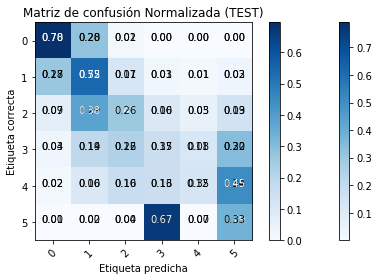

In [36]:
start_time = time.time()
clf_neigh = KNeighborsClassifier()
clf_neigh = clf_neigh.fit(features_std, labels)
y_pred_train = clf_neigh.predict(features_std)
total_time = time.time() - start_time
print("Time: %s seconds" % (total_time))

print("Train Score: %s" % rsme(labels, y_pred_train))
print(classification_report(labels, y_pred_train,labels=TARGET_CLASES, output_dict = False))
plot_confusion_matrix(confusion_matrix(labels, y_pred_train),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión Normalizada (TRAIN)")

y_pred_test = clf_neigh.predict(features_test_std)
print("Test Score: %s" % rsme(labels_test, y_pred_test))
print(classification_report(labels_test, y_pred_test,labels=TARGET_CLASES))
plot_confusion_matrix(confusion_matrix(labels_test, y_pred_test),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión Normalizada (TEST)")

results = results.append({'name': 'KNeighborsClassifier',
                          'model': clf_neigh,
                          'train_score': rsme(y_pred_train,labels),
                          'test_score': rsme(y_pred_test,labels_test),
                          'time': total_time,
                          'phase': 'Train'}, ignore_index=True)

In [37]:
clf_neigh_default_params = clf_neigh.get_params()
clf_neigh_default_params

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

En este caso, como se supuso inicialmente, la evaluación de los datasets de train y test no dieron muy diferentes. Pero, observando los valores absolutos de error, la performance es muy baja teniendo en cuenta que se entrenó con todos los datos de train.

In [38]:
results

,name,model,train_score,test_score,time,phase
0,SGDClassifier,"SGDClassifier(alpha=0.0001, average=False, cla...",1.325341,NaN,0.784838,Prueba
1,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",0.138883,NaN,0.226044,Prueba
2,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",0.322767,NaN,0.541687,Prueba
3,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,1.203827,NaN,13.682717,Prueba
4,KNeighborsClassifier,"KNeighborsClassifier(algorithm='auto', leaf_si...",1.063533,NaN,7.522428,Prueba
5,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",0.345854,1.190535,1.734979,Train
6,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",0.437697,1.134709,7.078236,Train
7,KNeighborsClassifier,"KNeighborsClassifier(algorithm='auto', leaf_si...",1.043590,1.063788,720.200313,Train


En conclusión de esta etapa, considerando que Random Forest y Decision Trees tuvieron excelentes resultados con el dataset de train y regulares con el de test, se decide avanzar con Random Forest (que es una generalización de Decision Trees) y buscar mejoras de performance mediante el ajuste de hiper-parámetros a fines de evitar el sobre-ajuste que degrada las métricas en test.

De todas maneras, también se decide continuar con K Neighbors dado que con este modelo se obtuvieron las mejores métricas para el dataset de test y también se buscará mejorar dichas métricas mediante el ajuste de hiper-parámetros, cuidando de no caer en sobre-ajuste.

### 6. Selección y evaluación de hiperparámetros

> Modificar los hiperparámetros propios del modelo, y volver a entrenar y evaluar. ¿Por qué se eligió dicho valor para modificar? ¿Qué consecuencias tuvo? ¿Mejoró la performance del modelo? Analice los resultados obtenidos en el contexto de la problemática.

#### 6.1.a Hiperparámetros en RandomForestClassifier con Randomized Search CV

La etapa de ajuste y evaluación de hiper-parámetros se realiza con el objetivo de probar diferentes valores de los parámetros que pueden impactar o controlar el sobre-ajuste que se observó en la etapa anterior. A continuación se describen los parámetros seleccionados y su justificación.

* **n_estimators**

Este parámetro define la cantidad de árboles que se entrenan en cada iteración y mientras mayor sea el número, menor es la posibilidad de hacer sobre-ajuste.

* **max_features**

Este parámetro define la cantidad de features que se consideran en la búsqueda de la mejor partición y mientras mayor sea el número, los árboles crecen en complejidad y eso puede derivar en que se terminan aprendiendo patrones que no son representativos de los datos y que terminen por no encontrarse en el dataset de test.

A fines de encontrar una mejor aproximación de los valores a explorar, en los parámetros seleccionados para ajustar, se realiza una validación cruzada con una selección aleatoria de los valores de los parámetros. Luego, el resultado obtenido, se tomará como punto de partida para un ajuste mediante Grid Search CV.

In [39]:
n_estimators = [int(x) + clf_rfc_default_params['n_estimators'] for x in \
                np.linspace(start = 10, stop = 1000, num = 100)]
max_features = ['auto', 'sqrt','log2']
if clf_rfc_default_params['max_depth'] is not None:
    max_depth = [int(x)  + clf_rfc_default_params['max_depth'] for x in np.linspace(10, 100, num = 10)]
    max_depth.append(None)
else:
    max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
    max_depth.append(None)
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/Users/nsalina/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 33.3min
/Users/nsalina/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 62.7min finished


Time: 3967.7782039642334 seconds
Train Score: 0.975069502451731
              precision    recall  f1-score   support

           0       0.75      0.79      0.77     70940
           1       0.72      0.79      0.75     98543
           2       0.73      0.56      0.63     56488
           3       0.80      0.41      0.54     40442
           4       0.91      0.30      0.45     35328
           5       0.66      0.95      0.78     93836

    accuracy                           0.71    395577
   macro avg       0.76      0.63      0.65    395577
weighted avg       0.74      0.71      0.70    395577

Test Score: 1.112184667330716
              precision    recall  f1-score   support

           0       0.75      0.73      0.74     35860
           1       0.58      0.60      0.59     36067
           2       0.44      0.28      0.35     15665
           3       0.24      0.11      0.15      6015
           4       0.07      0.04      0.05      1252
           5       0.00      0.67     

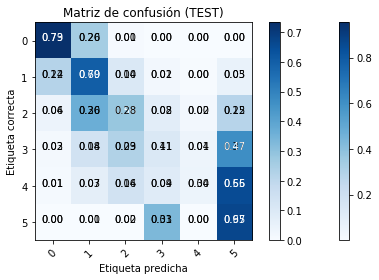

In [40]:
start_time = time.time()
rfc = RandomForestClassifier(random_state=0)
rfc_random = RandomizedSearchCV(estimator = rfc, 
                               param_distributions = random_grid, 
                               n_iter = 10, 
                               scoring = rsme_scorer,
                               cv = 3, 
                               verbose=4, 
                               n_jobs = -1)
rfc_random.fit(features_std, labels)
y_pred_train = rfc_random.predict(features_std)
total_time = time.time() - start_time
print("Time: %s seconds" % (total_time))

print("Train Score: %s" % rsme(labels, y_pred_train))
print(classification_report(labels, y_pred_train,labels=TARGET_CLASES))
plot_confusion_matrix(confusion_matrix(labels, y_pred_train),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión (TRAIN)")

y_pred_test = rfc_random.predict(features_test_std)
print("Test Score: %s" % rsme(labels_test, y_pred_test))
print(classification_report(labels_test, y_pred_test,labels=TARGET_CLASES))
plot_confusion_matrix(confusion_matrix(labels_test, y_pred_test),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión (TEST)")

results = results.append({'name': 'RandomForestClassifier',
                          'model': rfc_random.best_estimator_,
                          'train_score': rsme(y_pred_train,labels),
                          'test_score': rsme(y_pred_test,labels_test),
                          'time': total_time,
                          'phase': 'RSCV'}, ignore_index=True)

In [41]:
rfc_best_params = rfc_random.best_params_

#### 6.1.b Hiperparámetros en RandomForestClassifier con Grid Search CV

Se comparan los resultados en Test del modelo con parámetros por default y del obtenido mediante Randomized Search CV, se selecciona el mejor de ellos y se realiza un ajuste más fino de sus parámetros.

In [42]:
results

,name,model,train_score,test_score,time,phase
0,SGDClassifier,"SGDClassifier(alpha=0.0001, average=False, cla...",1.325341,NaN,0.784838,Prueba
1,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",0.138883,NaN,0.226044,Prueba
2,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",0.322767,NaN,0.541687,Prueba
3,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,1.203827,NaN,13.682717,Prueba
4,KNeighborsClassifier,"KNeighborsClassifier(algorithm='auto', leaf_si...",1.063533,NaN,7.522428,Prueba
5,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",0.345854,1.190535,1.734979,Train
6,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",0.437697,1.134709,7.078236,Train
7,KNeighborsClassifier,"KNeighborsClassifier(algorithm='auto', leaf_si...",1.043590,1.063788,720.200313,Train
8,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",0.975070,1.112185,3967.778204,RSCV


Dado que en la etapa de RSCV se obtuvieron mejores resultados, se utilizarán esos parámetros en vez de los que vienen por defecto.

In [48]:
train_score = results[(results.name == 'RandomForestClassifier')&(results.phase == 'Train')]['test_score'].item()
rscv_score = results[(results.name == 'RandomForestClassifier')&(results.phase == 'RSCV')]['test_score'].item()

In [51]:
if rscv_score < train_score:
    rfc_selected_params = rfc_best_params
else:
    rfc_selected_params = clf_rfc_default_params
rfc_selected_params

{'n_estimators': 420, 'max_features': 'log2', 'max_depth': 20}

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 145.0min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 175.3min finished


Time: 10691.310396194458 seconds
Train Score: 1.1325661225007821
              precision    recall  f1-score   support

           0       0.67      0.66      0.67     70940
           1       0.59      0.71      0.65     98543
           2       0.51      0.37      0.43     56488
           3       0.57      0.14      0.22     40442
           4       0.73      0.07      0.13     35328
           5       0.58      0.94      0.72     93836

    accuracy                           0.59    395577
   macro avg       0.61      0.48      0.47    395577
weighted avg       0.60      0.59      0.55    395577

Test Score: 1.1377291834911445
              precision    recall  f1-score   support

           0       0.76      0.72      0.74     35860
           1       0.58      0.64      0.61     36067
           2       0.46      0.28      0.35     15665
           3       0.27      0.06      0.10      6015
           4       0.07      0.01      0.01      1252
           5       0.00      0.67   

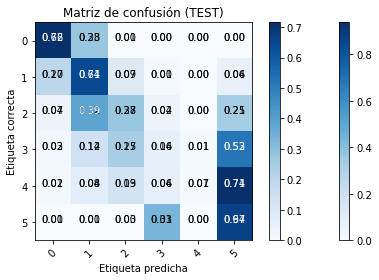

In [52]:
start_time = time.time()
parms ={
    'n_estimators': [rfc_selected_params['n_estimators'] + x for x in [-5, 5, 10, 15, 20, 30]],
    'max_features': [rfc_selected_params['max_features']],
    'max_depth': [rfc_selected_params['max_depth'] + x for x in [-5, 5, 10, 15, 20, 30]]
}
clf_rfc = RandomForestClassifier(random_state=0)
gscv_rfc = GridSearchCV(estimator=clf_rfc,
                               param_grid=parms,
                               scoring=rsme_scorer,
                               cv=3,
                               verbose=4, 
                               n_jobs=-1)
gscv_rfc.fit(features_std,labels)
y_pred_train = gscv_rfc.predict(features_std)
total_time = time.time() - start_time
print("Time: %s seconds" % (total_time))

print("Train Score: %s" % rsme(labels, y_pred_train))
print(classification_report(labels, y_pred_train,labels=TARGET_CLASES))
plot_confusion_matrix(confusion_matrix(labels, y_pred_train),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión (TRAIN)")

y_pred_test = gscv_rfc.predict(features_test_std)
print("Test Score: %s" % rsme(labels_test, y_pred_test))
print(classification_report(labels_test, y_pred_test,labels=TARGET_CLASES))
plot_confusion_matrix(confusion_matrix(labels_test, y_pred_test),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión (TEST)")

results = results.append({'name': 'RandomForestClassifier',
                          'model': gscv_rfc.best_estimator_,
                          'train_score': rsme(y_pred_train,labels),
                          'test_score': rsme(y_pred_test,labels_test),
                          'time': total_time,
                          'phase': 'GSCV'}, ignore_index=True)

In [53]:
results

,name,model,train_score,test_score,time,phase
0,SGDClassifier,"SGDClassifier(alpha=0.0001, average=False, cla...",1.325341,NaN,0.784838,Prueba
1,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",0.138883,NaN,0.226044,Prueba
2,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",0.322767,NaN,0.541687,Prueba
3,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,1.203827,NaN,13.682717,Prueba
4,KNeighborsClassifier,"KNeighborsClassifier(algorithm='auto', leaf_si...",1.063533,NaN,7.522428,Prueba
5,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",0.345854,1.190535,1.734979,Train
6,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",0.437697,1.134709,7.078236,Train
7,KNeighborsClassifier,"KNeighborsClassifier(algorithm='auto', leaf_si...",1.043590,1.063788,720.200313,Train
8,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",0.975070,1.112185,3967.778204,RSCV
9,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",1.132566,1.137729,10691.310396,GSCV


#### 6.2.a Hiperparámetros en KNeighborsClassifier con Randomized Search CV

La etapa de ajuste y evaluación de hiper-parámetros se realiza con el objetivo de probar diferentes valores de los parámetros que pueden mejorar la baja performance que se observó en la etapa anterior, pero sin caer en una situación de sobre-ajuste. A continuación se describen los parámetros seleccionados y su justificación.

* **n_neighbors**

Este parámetro define la cantidad de vecinos tomados como referencia para votar la clase de cada dato y, por lo tanto, tiene relación con el sobre-ajuste del modelo ya que, a menores valores de este parámetro, mayores posibilidades de generar sobre-ajuste.

* **p**

Este parámetro define la distancia que se utiliza como métrica para medir las similitudes o diferencias entre los datos y, dado que este modelo no utiliza probabilidades, es un parámetro que tiene una relevancia clave en la performance obtenida.

Al igual que en el caso de Random Forest, a fines de encontrar una mejor aproximación de los valores a explorar, en los parámetros seleccionados para ajustar, se realiza una validación cruzada con una selección aleatoria de los valores de los parámetros. Luego, el resultado obtenido, se tomará como punto de partida para un ajuste mediante Grid Search CV.

In [54]:
n_neighbors = [int(x) + clf_neigh_default_params['n_neighbors'] for x in np.linspace(start = 10, stop = 1000, num = 100)]
p = [int(x) + clf_neigh_default_params['n_neighbors'] for x in np.linspace(start = 1, stop = 5, num = 5)]
random_grid_knn = {'n_neighbors': n_neighbors,
               'p': p}

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 94.3min
/Users/nsalina/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/nsalina/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 148.6min finished


Time: 10227.351330041885 seconds
Train Score: 1.163760324752708
              precision    recall  f1-score   support

           0       0.64      0.65      0.64     70940
           1       0.54      0.66      0.60     98543
           2       0.40      0.28      0.33     56488
           3       0.32      0.11      0.17     40442
           4       0.34      0.05      0.08     35328
           5       0.58      0.90      0.71     93836

    accuracy                           0.55    395577
   macro avg       0.47      0.44      0.42    395577
weighted avg       0.51      0.55      0.50    395577

Test Score: 1.1224168242294663
              precision    recall  f1-score   support

           0       0.75      0.70      0.72     35860
           1       0.56      0.62      0.59     36067
           2       0.44      0.26      0.33     15665
           3       0.23      0.09      0.13      6015
           4       0.06      0.02      0.03      1252
           5       0.00      1.00    

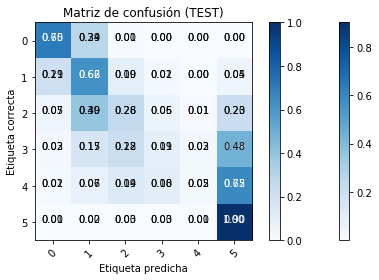

In [56]:
start_time = time.time()
clf_neigh = KNeighborsClassifier()
clf_neigh_random = RandomizedSearchCV(estimator = clf_neigh, 
                               param_distributions = random_grid_knn, 
                               n_iter = 10, 
                               scoring = rsme_scorer,
                               cv = 3, 
                               verbose=4, 
                               n_jobs = -1)
clf_neigh_random.fit(features_std, labels)
y_pred_train = clf_neigh_random.predict(features_std)
total_time = time.time() - start_time
print("Time: %s seconds" % (total_time))

print("Train Score: %s" % rsme(labels, y_pred_train))
print(classification_report(labels, y_pred_train,labels=TARGET_CLASES))
plot_confusion_matrix(confusion_matrix(labels, y_pred_train),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión (TRAIN)")

y_pred_test = clf_neigh_random.predict(features_test_std)
print("Test Score: %s" % rsme(labels_test, y_pred_test))
print(classification_report(labels_test, y_pred_test,labels=TARGET_CLASES))
plot_confusion_matrix(confusion_matrix(labels_test, y_pred_test),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión (TEST)")

results = results.append({'name': 'KNeighborsClassifier',
                          'model': clf_neigh_random.best_estimator_,
                          'train_score': rsme(y_pred_train,labels),
                          'test_score': rsme(y_pred_test,labels_test),
                          'time': total_time,
                          'phase': 'RSCV'}, ignore_index=True)

In [57]:
clf_neigh_best_params = clf_neigh_random.best_params_

#### 6.2.b Hiperparámetros en K Neighbors con Grid Search CV

Se comparan los resultados en Test del modelo con parámetros por default y del obtenido mediante Randomized Search CV, se selecciona el mejor de ellos y se realiza un ajuste más fino de sus parámetros.

In [58]:
results

,name,model,train_score,test_score,time,phase
0,SGDClassifier,"SGDClassifier(alpha=0.0001, average=False, cla...",1.325341,NaN,0.784838,Prueba
1,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",0.138883,NaN,0.226044,Prueba
2,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",0.322767,NaN,0.541687,Prueba
3,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,1.203827,NaN,13.682717,Prueba
4,KNeighborsClassifier,"KNeighborsClassifier(algorithm='auto', leaf_si...",1.063533,NaN,7.522428,Prueba
5,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",0.345854,1.190535,1.734979,Train
6,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",0.437697,1.134709,7.078236,Train
7,KNeighborsClassifier,"KNeighborsClassifier(algorithm='auto', leaf_si...",1.043590,1.063788,720.200313,Train
8,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",0.975070,1.112185,3967.778204,RSCV
9,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",1.132566,1.137729,10691.310396,GSCV


Dado que en la etapa de RSCV no se lograron mejorar los resultados, se utilizarán los parámetros que vienen por defecto.

In [59]:
train_score = results[(results.name == 'KNeighborsClassifier')&(results.phase == 'Train')]['test_score'].item()
rscv_score = results[(results.name == 'KNeighborsClassifier')&(results.phase == 'RSCV')]['test_score'].item()
if rscv_score < train_score:
    neigh_selected_params = clf_neigh_best_params
else:
    neigh_selected_params = clf_neigh_default_params
neigh_selected_params

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [60]:
neigh_selected_params = clf_neigh_default_params
neigh_selected_params

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 55.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 92.0min finished


Time: 6219.706017971039 seconds
Train Score: 1.0896972603054198
              precision    recall  f1-score   support

           0       0.67      0.74      0.70     70940
           1       0.59      0.68      0.63     98543
           2       0.48      0.37      0.41     56488
           3       0.42      0.25      0.32     40442
           4       0.44      0.21      0.29     35328
           5       0.66      0.83      0.74     93836

    accuracy                           0.60    395577
   macro avg       0.54      0.51      0.52    395577
weighted avg       0.57      0.60      0.58    395577

Test Score: 1.0688885922426865
              precision    recall  f1-score   support

           0       0.72      0.71      0.71     35860
           1       0.54      0.57      0.56     36067
           2       0.42      0.26      0.32     15665
           3       0.25      0.14      0.18      6015
           4       0.07      0.09      0.08      1252
           5       0.00      0.67    

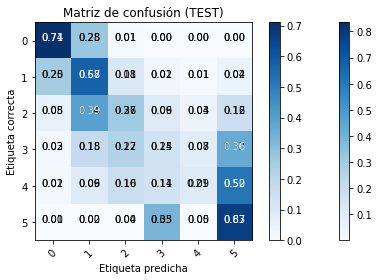

In [61]:
start_time = time.time()
parms ={
    'n_neighbors': [neigh_selected_params['n_neighbors'] + x for x in [-2, -1, 1, 2, 5]],
    'p': [neigh_selected_params['p'] + x for x in [-1, 1]]
}
clf_neigh = KNeighborsClassifier()
gscv_clf_neigh = GridSearchCV(estimator=clf_neigh,
                               param_grid=parms,
                               scoring=rsme_scorer,
                               cv=3,
                               verbose=4, 
                               n_jobs=-1)
gscv_clf_neigh.fit(features_std,labels)
y_pred_train = gscv_clf_neigh.predict(features_std)
total_time = time.time() - start_time
print("Time: %s seconds" % (total_time))

print("Train Score: %s" % rsme(labels, y_pred_train))
print(classification_report(labels, y_pred_train,labels=TARGET_CLASES))
plot_confusion_matrix(confusion_matrix(labels, y_pred_train),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión (TRAIN)")

y_pred_test = gscv_clf_neigh.predict(features_test_std)
print("Test Score: %s" % rsme(labels_test, y_pred_test))
print(classification_report(labels_test, y_pred_test,labels=TARGET_CLASES))
plot_confusion_matrix(confusion_matrix(labels_test, y_pred_test),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión (TEST)")

results = results.append({'name': 'KNeighborsClassifier',
                          'model': gscv_clf_neigh.best_estimator_,
                          'train_score': rsme(y_pred_train,labels),
                          'test_score': rsme(y_pred_test,labels_test),
                          'time': total_time,
                          'phase': 'GSCV'}, ignore_index=True)

In [62]:
results

,name,model,train_score,test_score,time,phase
0,SGDClassifier,"SGDClassifier(alpha=0.0001, average=False, cla...",1.325341,NaN,0.784838,Prueba
1,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",0.138883,NaN,0.226044,Prueba
2,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",0.322767,NaN,0.541687,Prueba
3,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,1.203827,NaN,13.682717,Prueba
4,KNeighborsClassifier,"KNeighborsClassifier(algorithm='auto', leaf_si...",1.063533,NaN,7.522428,Prueba
5,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",0.345854,1.190535,1.734979,Train
6,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",0.437697,1.134709,7.078236,Train
7,KNeighborsClassifier,"KNeighborsClassifier(algorithm='auto', leaf_si...",1.043590,1.063788,720.200313,Train
8,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",0.975070,1.112185,3967.778204,RSCV
9,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",1.132566,1.137729,10691.310396,GSCV


In [63]:
results[results.test_score == results.test_score.min()]['model'].item()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

En vista de lo anterior, se puede observar que los mejores resultados se obtuvieron en la etapa de Train, con el modelo K Neighbors parametrizado de la siguiente forma:

| Parámetro | Valor |
| --------- | ----- |
| algorithm | 'auto' |
| leaf_size | 30 |
| metric | 'minkowski' |
| metric_params | None |
| n_jobs | None |
| __**n_neighbors**__ | _**5**_ |
| _**p**_ | _**2**_|
| weights | 'uniform' |

### 7. Comparación entre el tipo de modelo seleccionado y el descartado

> En los puntos anteriores se seleccionó un modelo de regresión o bien uno de clasificación. Realice una prueba con un modelo del otro tipo y comente sobre las métricas y los resultados obtenidos. ¿Por qué tuvo mejor o peor perfomance?

Para poder comparar los resultados, se utilizará la columna original de *shipment_days* en el entrenamiento de los regresores. Luego de obtener las predicciones, se traducirán dichos valores a categorías entre 0 y 5. De esta manera, se podrá utilizar los mismos labels de train y test y la misma función de score que en los clasificadores.

In [64]:
labels_reg = ds_train[TARGET_ID_REG]

#### 7.1 Entrenamiento de Ridge

In [65]:
start_time = time.time()
reg_ridge = linear_model.Ridge(random_state=0)
reg_ridge = reg_ridge.fit(features_std, labels_reg)

y_pred_train = reg_ridge.predict(features_std)
y_pred_train = np.array([map_categories_5(x) for x in y_pred_train])

total_time = time.time() - start_time
print("Time: %s seconds" % (total_time))

print('Score para entrenamiento: %.4f' % 
      rsme(labels, y_pred_train ))

y_pred_test = reg_ridge.predict(features_test_std)
y_pred_test = np.array([map_categories_5(x) for x in y_pred_test])

print('Score para test: %.4f' %
      rsme(labels_test, y_pred_test))

results = results.append({'name': 'Ridge',
                          'model': reg_ridge,
                          'train_score': rsme(labels, y_pred_train),
                          'test_score': rsme(labels_test, y_pred_test),
                          'time': total_time,
                          'phase': 'Train'}, ignore_index=True)

Time: 0.7292139530181885 seconds
Score para entrenamiento: 1.1861
Score para test: 1.2963


Ridge es un modelo de regresión lineal, que intenta minimizar la suma del cuadrado de las distancias entre los puntos, a partir de una función de costo sobre el cuadrado de los coeficientes. Vemos que con los parámetros estándar está bastante lejos de los números obtenidos en la sección anterior.

#### 7.2 Entrenamiento de BayesianRidge

In [66]:
start_time = time.time()
reg_bridge = linear_model.BayesianRidge()
reg_bridge = reg_bridge.fit(features_std, labels_reg)

y_pred_train = reg_bridge.predict(features_std)
y_pred_train = np.array([map_categories_5(x) for x in y_pred_train])

total_time = time.time() - start_time
print("Time: %s seconds" % (total_time))

print('Score para entrenamiento: %.4f' % 
      rsme(labels, y_pred_train))

y_pred_test = reg_bridge.predict(features_test_std)
y_pred_test = np.array([map_categories_5(x) for x in y_pred_test])

print('Score para test: %.4f' %
      rsme(labels_test, y_pred_test))

results = results.append({'name': 'BayesianRidge',
                          'model': reg_bridge,
                          'train_score': rsme(labels, y_pred_train),
                          'test_score': rsme(labels_test, y_pred_test),
                          'time': total_time,
                          'phase': 'Train'}, ignore_index=True)

Time: 0.8860199451446533 seconds
Score para entrenamiento: 1.1861
Score para test: 1.2964


Similarmente a Rigde, Bayessian Ridge intenta minimizar el cuadrado de la distancia entre los puntos, pero asumiendo una distribución normal, obteniendo resultados similares.

#### 7.3 Entrenamiento de KNeighborsRegressor

In [67]:
start_time = time.time()
reg_knr = neighbors.KNeighborsRegressor()
reg_knr = reg_knr.fit(features_std, labels_reg)

y_pred_train = reg_knr.predict(features_std)
y_pred_train = np.array([map_categories_5(x) for x in y_pred_train])

total_time = time.time() - start_time
print("Time: %s seconds" % (total_time))

print('Score para entrenamiento: %.4f' % 
      rsme(labels, y_pred_train))

y_pred_test = reg_knr.predict(features_test_std)
y_pred_test = np.array([map_categories_5(x) for x in y_pred_test])

print('Score para test: %.4f' %
      rsme(labels_test, y_pred_test))

results = results.append({'name': 'KNeighborsRegressor',
                          'model': reg_knr,
                          'train_score': rsme(labels, y_pred_train),
                          'test_score': rsme(labels_test, y_pred_test),
                          'time': total_time,
                          'phase': 'Train'}, ignore_index=True)

Time: 667.0715479850769 seconds
Score para entrenamiento: 0.9343
Score para test: 1.1178


Kneighbor Regresor funciona de manera similar al Clasificador, con lo cual obtiene sus estimaciones a partir de la información de los k vecinos más cercanos. Si bien los resultados son muy buenos (al menos en comparación con los otros regresores) de todos modos no son mejores que el clasificador propuesto.

#### 7.4 Entrenamiento de LinearSVR

In [68]:
start_time = time.time()
reg_svr = svm.LinearSVR(random_state=0)
reg_svr = reg_svr.fit(features_std, labels_reg)

y_pred_train = reg_svr.predict(features_std)
y_pred_train = np.array([map_categories_5(x) for x in y_pred_train])

total_time = time.time() - start_time
print("Time: %s seconds" % (total_time))

print('Score para entrenamiento: %.2f' % 
      rsme(labels, y_pred_train))

y_pred_test = reg_svr.predict(features_test_std)
y_pred_test = np.array([map_categories_5(x) for x in y_pred_test])

print('Score para test: %.2f' %
      rsme(labels_test, y_pred_test))

results = results.append({'name': 'LinearSVR',
                          'model': reg_svr,
                          'train_score': rsme(labels, y_pred_train),
                          'test_score': rsme(labels_test, y_pred_test),
                          'time': total_time,
                          'phase': 'Train'}, ignore_index=True)

Time: 13.037760972976685 seconds
Score para entrenamiento: 1.14
Score para test: 1.22


LinearSVR funciona de manera similar a SVR (que intenta acotar el error dentro de algún parámetro razonable) pero con un kernel (mapeo de dimensiones) "lineal". Los resultados son un poco mejores que (Bayessian)Ridge, pero de entre los peores de todos los modelos utilizados.

## Conclusiones

In [69]:
results

,name,model,train_score,test_score,time,phase
0,SGDClassifier,"SGDClassifier(alpha=0.0001, average=False, cla...",1.325341,NaN,0.784838,Prueba
1,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",0.138883,NaN,0.226044,Prueba
2,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",0.322767,NaN,0.541687,Prueba
3,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,1.203827,NaN,13.682717,Prueba
4,KNeighborsClassifier,"KNeighborsClassifier(algorithm='auto', leaf_si...",1.063533,NaN,7.522428,Prueba
5,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",0.345854,1.190535,1.734979,Train
6,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",0.437697,1.134709,7.078236,Train
7,KNeighborsClassifier,"KNeighborsClassifier(algorithm='auto', leaf_si...",1.043590,1.063788,720.200313,Train
8,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",0.975070,1.112185,3967.778204,RSCV
9,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",1.132566,1.137729,10691.310396,GSCV


Se realizaron pruebas para el problema dado, tanto para clasificadores como para regresores. La hipótesis (tentativa y arbitraria) de que encarar el problema con un clasificador tenía más sentido, se verifica con los resultados dados. Los resultados se exponen arriba, con los parámetros utilizados y las métricas elegidas para compararlos unos a otros.